# RFM Customer Segmentation

## By Vahid Naseri

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import Files

In [2]:
df = pd.read_csv('.../scanner_data.csv')

## Data Inspection

In [3]:
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [4]:
df.shape

(131706, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [6]:
df.describe()

,Unnamed: 0,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485311,11.981524
std,38020.391614,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


In [7]:
df['Total_Sales'] = df['Quantity'] * df['Sales_Amount']

In [8]:
df['Total_Sales'].describe()

count    131706.000000
mean         20.959632
std         101.323971
min           0.000600
25%           4.500000
50%           7.640000
75%          16.440000
max       13164.800000
Name: Total_Sales, dtype: float64

Text(0, 0.5, 'Frequency')

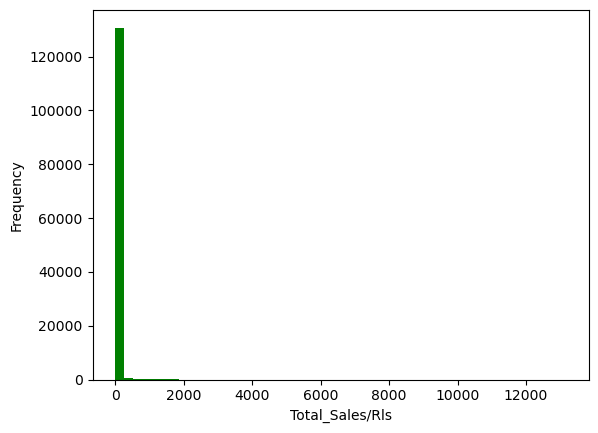

In [9]:
#Histogram of total purchase
plt.hist(df['Total_Sales'], color = 'green', 
         bins = np.linspace(df['Total_Sales'].min(), df['Total_Sales'].max(), 50))
plt.xlabel('Total_Sales/Rls')
plt.ylabel('Frequency')

In [10]:
from datetime import datetime

In [56]:
df['Date'] = pd.to_datetime(df["Date"])

In [12]:
daily_demand = df.groupby(by = ['Date'])['Transaction_ID'].count()

(array([16801., 16861., 16922., 16983., 17045., 17106., 17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

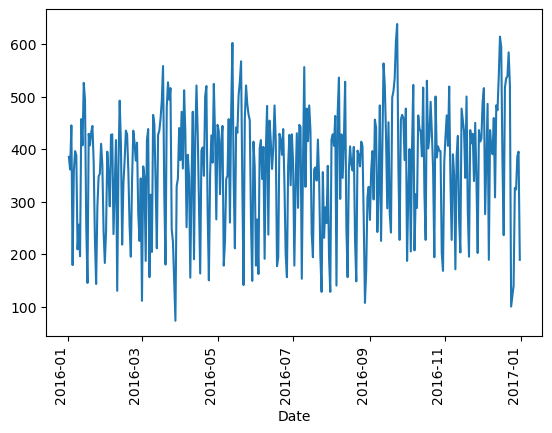

In [13]:
daily_demand.plot()
plt.xticks(rotation = 90) 

## Create RFM Dataset

### 1. Frequency

In [14]:
Cust_freq = pd.DataFrame({'Freq' : df.groupby(by = ['Customer_ID'])['Transaction_ID'].count()})

In [15]:
Cust_freq

,Freq
Customer_ID,
1,2
2,2
3,3
4,5
5,5
...,...
22621,2
22622,1
22623,2


Text(0, 0.5, 'Frequency')

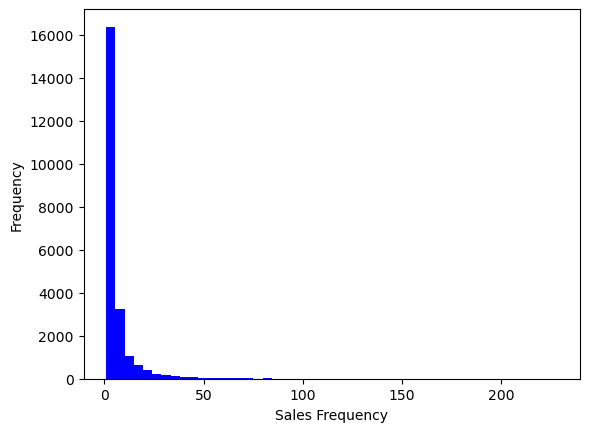

In [16]:
#Histogram of Sales frequency
plt.hist(Cust_freq['Freq'], color = 'blue', 
         bins = np.linspace(Cust_freq['Freq'].min(), Cust_freq['Freq'].max(), 50))
plt.xlabel('Sales Frequency')
plt.ylabel('Frequency')

In [17]:
Cust_freq.describe()

,Freq
count,22625.000000
mean,5.821260
std,9.887028
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,228.000000


### 2. Recency

In [18]:
df['Recency'] = pd.to_datetime('01/01/2017') - df['Date']

In [19]:
df['Recency'] = df['Recency'].dt.days

In [20]:
df.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Total_Sales,Recency
0,1,2016-02-01,2547,1,X52,0EM7L,1.0,3.13,3.13,335
1,2,2016-02-01,822,2,2ML,68BRQ,1.0,5.46,5.46,335
2,3,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35,6.35,335
3,4,2016-02-01,3719,4,0H2,549KK,1.0,5.59,5.59,335
4,5,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88,6.88,335


In [21]:
Cust_Recen = pd.DataFrame({'Recen' :  df.groupby(by = ['Customer_ID'])['Recency'].min()})

In [22]:
Cust_Recen.describe()

,Recen
count,22625.000000
mean,145.408796
std,109.263227
min,1.000000
25%,45.000000
50%,121.000000
75%,243.000000
max,365.000000


Text(0, 0.5, 'Frequency')

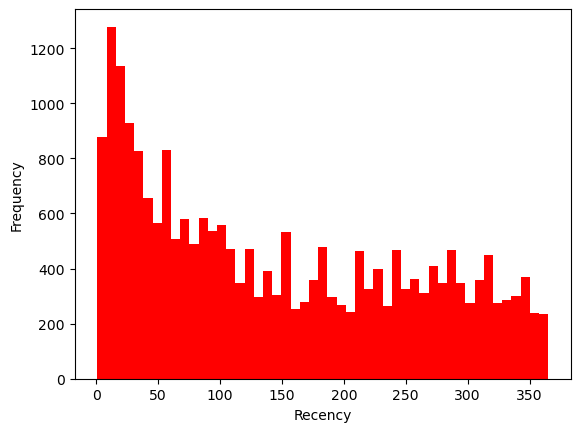

In [23]:
#Histogram of recency
plt.hist(Cust_Recen['Recen'], color = 'red', 
         bins = np.linspace(Cust_Recen['Recen'].min(), Cust_Recen['Recen'].max(), 50))
plt.xlabel('Recency')
plt.ylabel('Frequency')

### 3. Monetary

In [24]:
Cust_Mon = pd.DataFrame({'Monetary': df.groupby(by = ['Customer_ID'])['Total_Sales'].sum()})
Cust_Mon

,Monetary
Customer_ID,
1,16.29
2,22.77
3,19.08
4,33.29
5,248.27
...,...
22621,17.19
22622,6.07
22623,225.87


In [25]:
Cust_Mon.describe()

,Monetary
count,22625.000000
mean,122.011461
std,482.101388
min,0.140000
25%,10.810000
50%,27.260000
75%,83.080000
max,40070.491000


Text(0, 0.5, 'Frequency')

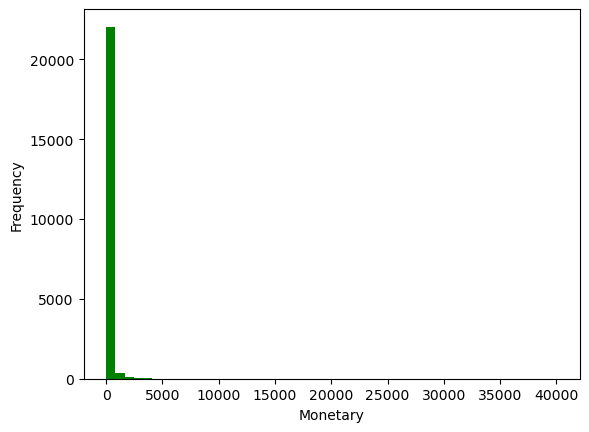

In [26]:
#Histogram of Monetary
plt.hist(Cust_Mon['Monetary'], color = 'green', 
         bins = np.linspace(Cust_Mon['Monetary'].min(), Cust_Mon['Monetary'].max(), 50))
plt.xlabel('Monetary')
plt.ylabel('Frequency')

### Preparing RFM Dateframe

In [27]:
df_RFM = Cust_freq.merge(Cust_Mon, left_index = True, right_index = True)
df_RFM

,Freq,Monetary
Customer_ID,,
1,2,16.29
2,2,22.77
3,3,19.08
4,5,33.29
5,5,248.27
...,...,...
22621,2,17.19
22622,1,6.07
22623,2,225.87


In [28]:
df_RFM = df_RFM.merge(Cust_Recen, left_index = True, right_index = True)
df_RFM

,Freq,Monetary,Recen
Customer_ID,,,
1,2,16.29,345
2,2,22.77,196
3,3,19.08,335
4,5,33.29,55
5,5,248.27,121
...,...,...,...
22621,2,17.19,81
22622,1,6.07,16
22623,2,225.87,11


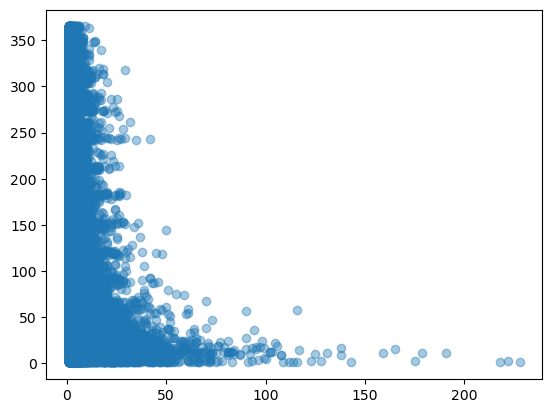

In [29]:
plt.scatter(x = df_RFM['Freq'], y = df_RFM['Recen'], alpha = 0.4)

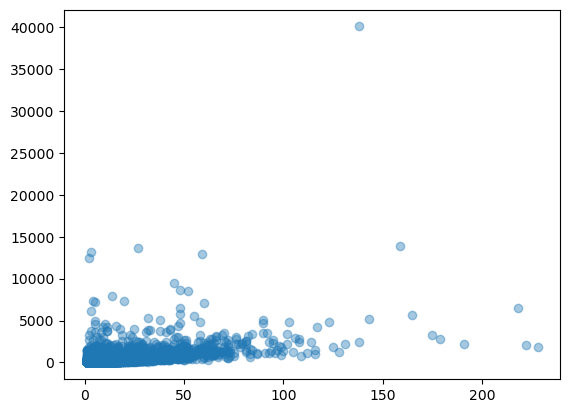

In [30]:
plt.scatter(x = df_RFM['Freq'], y = df_RFM['Monetary'], alpha = 0.4)

In [31]:
df_RFM.corr(method = 'pearson')

,Freq,Monetary,Recen
Freq,1.000000,0.543494,-0.312963
Monetary,0.543494,1.000000,-0.142242
Recen,-0.312963,-0.142242,1.000000


In [32]:
df_RFM_2 = df_RFM.loc[:, ['Freq', 'Recen']]

In [33]:
df_RFM_2

,Freq,Recen
Customer_ID,,
1,2,345
2,2,196
3,3,335
4,5,55
5,5,121
...,...,...
22621,2,81
22622,1,16
22623,2,11


In [34]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(df_RFM_2)
scaled_data

array([[-0.38650079,  1.82674099],
       [-0.38650079,  0.46303156],
       [-0.28535592,  1.73521687],
       ...,
       [-0.38650079, -1.23016471],
       [-0.38650079,  1.63454034],
       [ 0.32151326, -1.32168884]])

In [35]:
scaled_data = pd.DataFrame(df_RFM, 
                           columns = df_RFM_2.columns, 
                           index = df_RFM_2.index)

In [36]:
scaled_data

,Freq,Recen
Customer_ID,,
1,2,345
2,2,196
3,3,335
4,5,55
5,5,121
...,...,...
22621,2,81
22622,1,16
22623,2,11


## Finding best number for clustering

### Elbow Method

In [37]:
from sklearn.cluster import KMeans
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

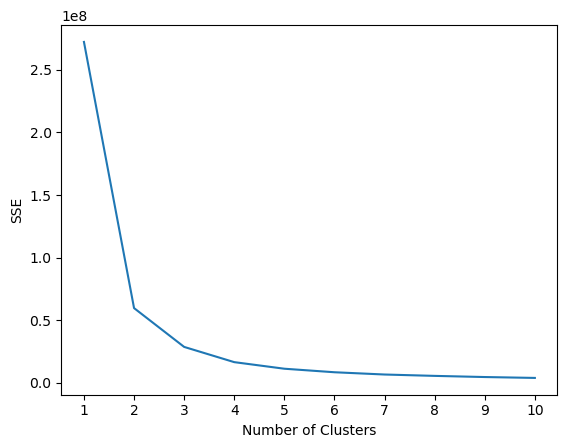

In [38]:
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Silhouette Coefficient

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 1234, n_init = 10)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

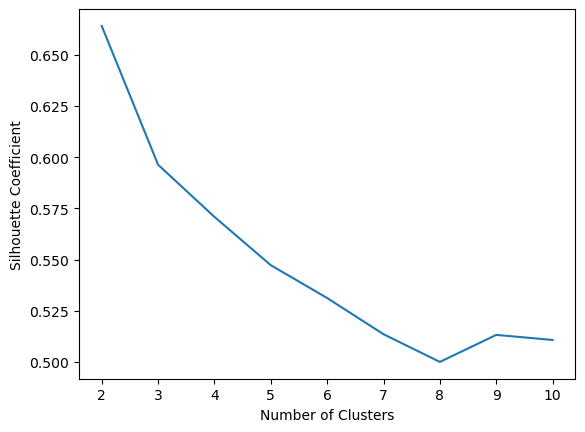

In [41]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## K-Means

In [42]:
km1 = KMeans(n_clusters = 3, init = 'random', random_state = 123, n_init = 1).fit(scaled_data)

In [43]:
df_RFM['KM1'] = km1.predict(scaled_data)

In [44]:
df_RFM

,Freq,Monetary,Recen,KM1
Customer_ID,,,,
1,2,16.29,345,1
2,2,22.77,196,0
3,3,19.08,335,1
4,5,33.29,55,2
5,5,248.27,121,0
...,...,...,...,...
22621,2,17.19,81,2
22622,1,6.07,16,2
22623,2,225.87,11,2


In [45]:
df_RFM.groupby(['KM1'])[['Freq', 'Monetary', 'Recen']].mean()

,Freq,Monetary,Recen
KM1,,,
0,3.744780,72.313807,167.483427
1,2.693961,56.320229,295.058254
2,8.830428,188.716044,45.841097


Text(0, 0.5, 'Recen')

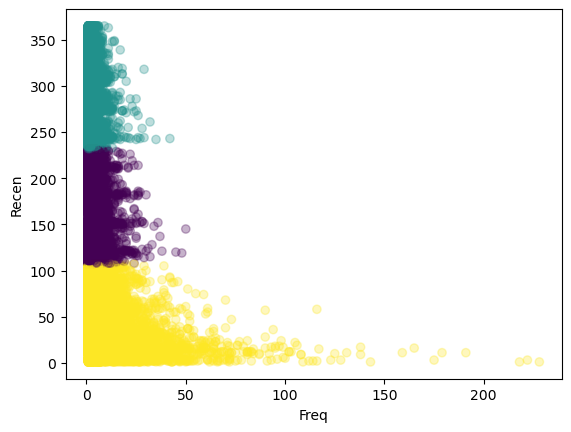

In [46]:
plt.scatter(x = df_RFM['Freq'], y = df_RFM['Recen'], 
            c = df_RFM['KM1'], alpha = 0.3)
plt.xlabel('Freq')
plt.ylabel('Recen')

In [47]:
km2 = KMeans(n_clusters = 3, init = 'random', random_state = 500, n_init = 1).fit(scaled_data)

In [48]:
df_RFM['KM2'] = km2.predict(scaled_data)

In [49]:
df_RFM

,Freq,Monetary,Recen,KM1,KM2
Customer_ID,,,,,
1,2,16.29,345,1,2
2,2,22.77,196,0,1
3,3,19.08,335,1,2
4,5,33.29,55,2,0
5,5,248.27,121,0,1
...,...,...,...,...,...
22621,2,17.19,81,2,0
22622,1,6.07,16,2,0
22623,2,225.87,11,2,0


In [50]:
df_RFM.groupby(['KM2'])[['Freq', 'Monetary', 'Recen']].mean()

,Freq,Monetary,Recen
KM2,,,
0,9.132627,196.470933,42.496218
1,3.812470,72.768521,157.799968
2,2.684284,55.400587,291.146654


Text(0, 0.5, 'Recen')

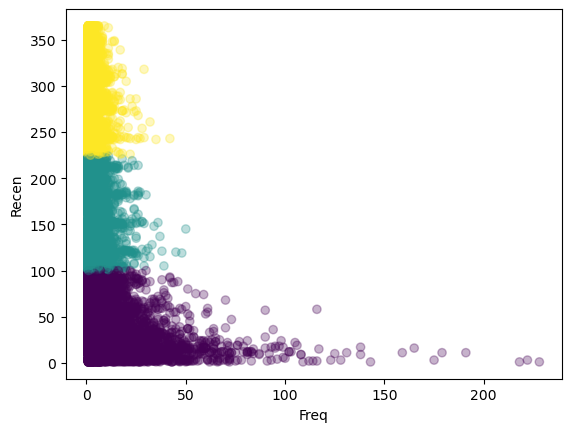

In [51]:
plt.scatter(x = df_RFM['Freq'], y = df_RFM['Recen'], 
            c = df_RFM['KM2'], alpha = 0.3)
plt.xlabel('Freq')
plt.ylabel('Recen')

## K-Means ++

In [52]:
km3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1000, n_init = 15).fit(scaled_data)

In [53]:
df_RFM['KM3'] = km3.predict(scaled_data)
df_RFM

,Freq,Monetary,Recen,KM1,KM2,KM3
Customer_ID,,,,,,
1,2,16.29,345,1,2,0
2,2,22.77,196,0,1,2
3,3,19.08,335,1,2,0
4,5,33.29,55,2,0,1
5,5,248.27,121,0,1,2
...,...,...,...,...,...,...
22621,2,17.19,81,2,0,1
22622,1,6.07,16,2,0,1
22623,2,225.87,11,2,0,1


In [54]:
df_RFM.groupby(['KM3'])[['Freq', 'Monetary', 'Recen']].mean()

,Freq,Monetary,Recen
KM3,,,
0,2.689902,56.048520,294.578339
1,8.862397,189.600602,45.359036
2,3.771537,72.783844,166.166035


Text(0, 0.5, 'Recen')

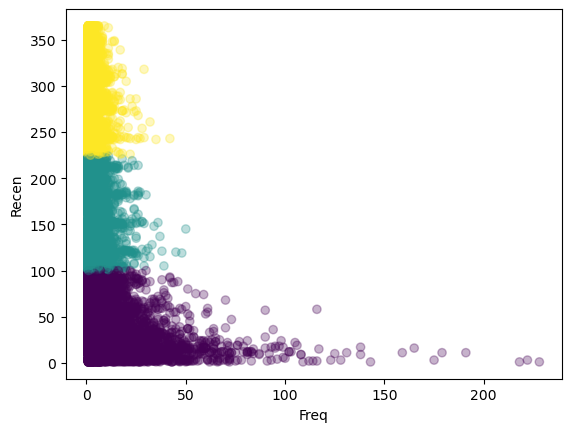

In [55]:
plt.scatter(x = df_RFM['Freq'], y = df_RFM['Recen'], 
            c = df_RFM['KM2'], alpha = 0.3)
plt.xlabel('Freq')
plt.ylabel('Recen')

# End Of The Code